# Climate Change and Global Temperature Analyses Project

We are going to Analyse the Global Temperature in recent years,
The data will be city_temperature.csv which has temperature data of cities in every continent.
* Created and uploaded by: Alireza Boroon, Sahar Khaleghian
<hr>


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from xgboost import XGBRegressor

## Loading Dataset

In [2]:
cities_temp = pd.read_csv("city_temperature.csv")

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cities_temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
cities_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [5]:
cities_temp.shape

(2906327, 8)

In [6]:
cities_temp.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


## Checking Missing Values

In [7]:
cities_temp.count()

Region            2906327
Country           2906327
State             1455337
City              2906327
Month             2906327
Day               2906327
Year              2906327
AvgTemperature    2906327
dtype: int64

In [8]:
cities_temp.isna().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

* In column "State", we have some missing values(Nan)

## Handeling with missing values: Delete column "State"

In [9]:
del cities_temp['State']

In [10]:
cities_temp.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [11]:
cities_temp.isna().sum()

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

* We don't have missing values any more. Our dataset is ready for analyzing.

## Exploring and Visualising our dataset

Text(0.5, 1.0, 'Regions average temperature range')

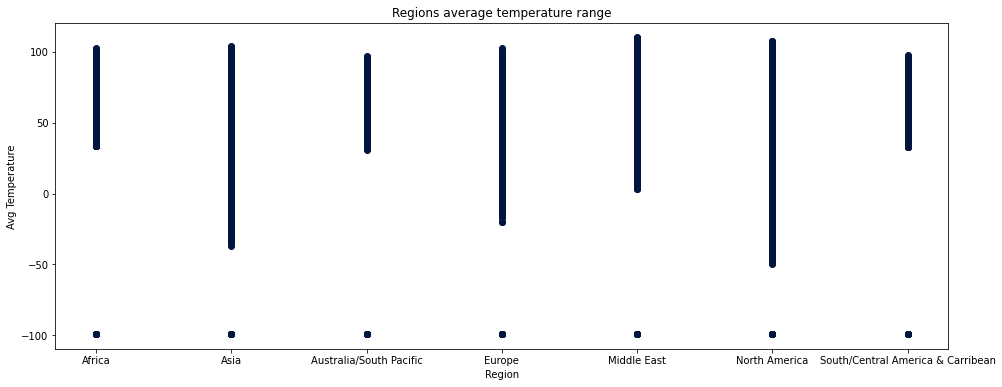

In [12]:
plt.figure(figsize= (16,6))
plt.scatter(x= cities_temp["Region"], y= cities_temp["AvgTemperature"], color= "#01153E")

plt.xlabel("Region")
plt.ylabel("Avg Temperature")
plt.title("Regions average temperature range")

* Here we have some out of range data (about -100 in avg Temperature) that they are invalid. So we decided to delete these values. 

In [13]:
out_of_range = cities_temp[cities_temp['AvgTemperature']==-99]['Region'].reset_index()
out_of_range

,index,Region
0,220,Africa
1,221,Africa
2,408,Africa
3,409,Africa
4,1453,Africa
...,...,...
79667,2905471,North America
79668,2905534,North America
79669,2905689,North America
79670,2905726,North America


In [14]:
# grouping number of out of range data for each region in one dictionary:
count = 0
out_of_range_dict = {}
for i in out_of_range['Region']:
    if i not in out_of_range_dict.keys():
        out_of_range_dict[i] = count + 1
    else:
        out_of_range_dict[i] = out_of_range_dict[i]+1
    count = 0
out_of_range_dict

{'Africa': 30199,
 'Asia': 10500,
 'Australia/South Pacific': 387,
 'Europe': 13288,
 'Middle East': 3938,
 'North America': 8521,
 'South/Central America & Carribean': 12839}

Text(0, 0.5, 'Count')

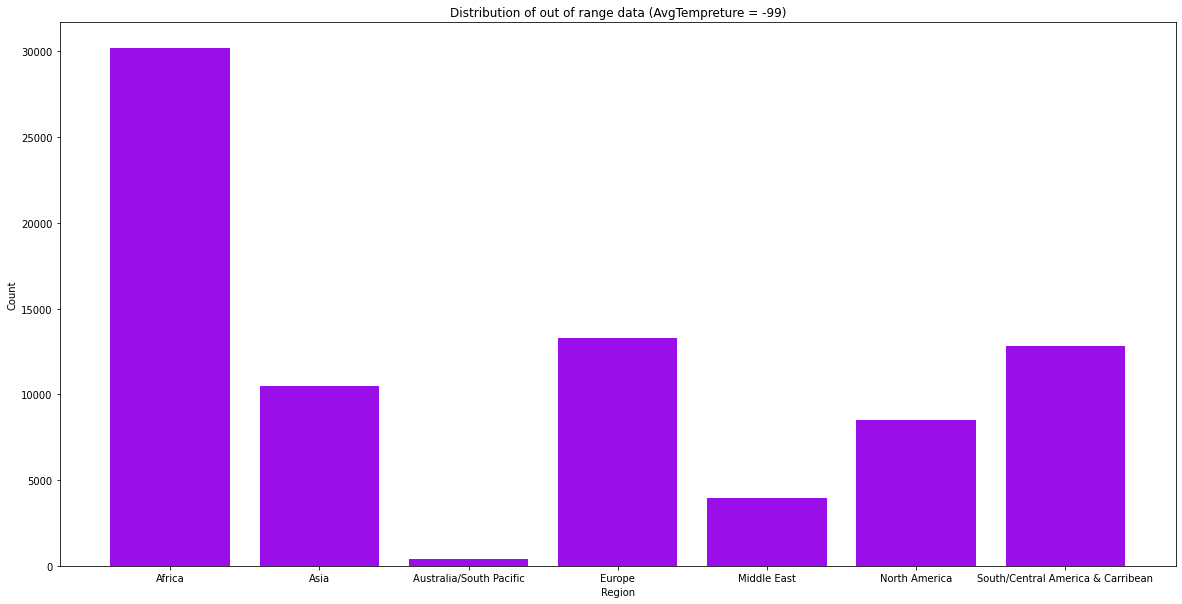

In [15]:
plt.figure(figsize= (20, 10))
plt.bar(x= out_of_range_dict.keys(), height = out_of_range_dict.values(), color = '#9A0EEA')

plt.title('Distribution of out of range data (AvgTempreture = -99)')
plt.xlabel('Region')
plt.ylabel('Count')

In [16]:
# Deleting all out of range datas from our dataset to be ready to go:
cities_temp = cities_temp[cities_temp['AvgTemperature'] != -99]

Text(0.5, 1.0, 'Regions average temperature range')

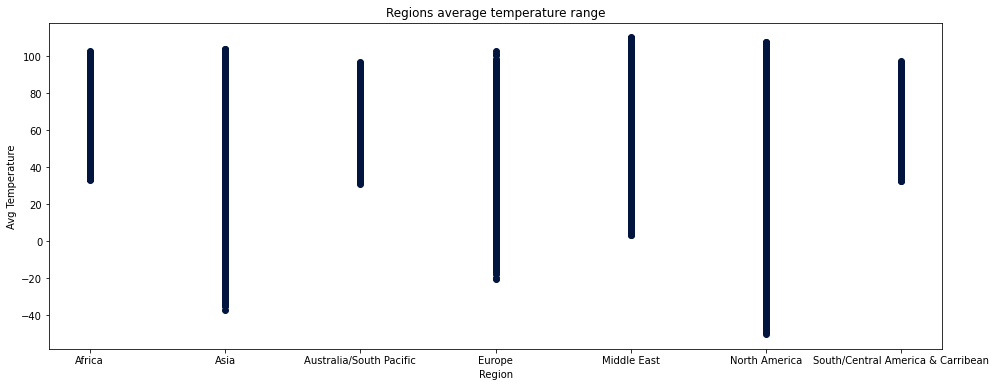

In [17]:
plt.figure(figsize= (16,6))
plt.scatter(x= cities_temp["Region"], y= cities_temp["AvgTemperature"], color = '#01153E')

plt.xlabel("Region")
plt.ylabel("Avg Temperature")
plt.title("Regions average temperature range")

In [18]:
# Computing Average Temperatures for each region for all years: 
avg_temp_in_every_region = cities_temp.groupby("Region")["AvgTemperature"].mean()
avg_temp_in_every_region

Region
Africa                               74.402602
Asia                                 68.109723
Australia/South Pacific              62.303693
Europe                               51.947171
Middle East                          73.840683
North America                        56.150198
South/Central America & Carribean    72.202024
Name: AvgTemperature, dtype: float64

Text(0.5, 1.0, 'Regions average temperature')

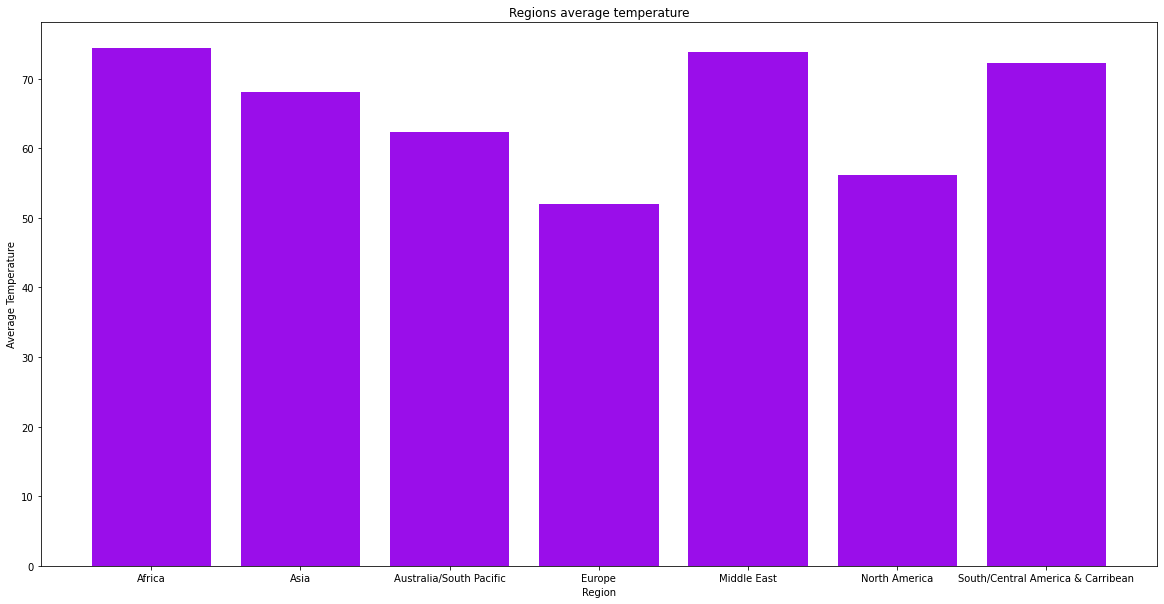

In [19]:
plt.figure(figsize= (20,10))

plt.bar(x= avg_temp_in_every_region.index, height= avg_temp_in_every_region.values, color= '#9A0EEA')

plt.xlabel("Region")
plt.ylabel("Average Temperature")
plt.title("Regions average temperature")

In [20]:
cities_temp
# Our Dataset:

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,San Juan Puerto Rico,7,30,2013,83.8


## Analyzing our Dataset by "Region"

In [21]:
regions = cities_temp['Region'].unique()

print(regions)

['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']


In [22]:
# Grouping Regions by all years and Average Temperatures:
groupby_region_year = cities_temp.groupby(["Region", "Year"])["AvgTemperature"].mean().reset_index()
groupby_region_year

,Region,Year,AvgTemperature
0,Africa,1995,73.890036
1,Africa,1996,73.554702
2,Africa,1997,73.441142
3,Africa,1998,73.748808
4,Africa,1999,73.894222
...,...,...,...
177,South/Central America & Carribean,2016,73.618998
178,South/Central America & Carribean,2017,73.417055
179,South/Central America & Carribean,2018,72.677205
180,South/Central America & Carribean,2019,73.197650


## Africa

In [23]:
africa = groupby_region_year[groupby_region_year['Region'] == 'Africa']
africa

,Region,Year,AvgTemperature
0,Africa,1995,73.890036
1,Africa,1996,73.554702
2,Africa,1997,73.441142
3,Africa,1998,73.748808
4,Africa,1999,73.894222
5,Africa,2000,73.417745
6,Africa,2001,74.296694
7,Africa,2002,74.288789
8,Africa,2003,74.783506
9,Africa,2004,74.639458


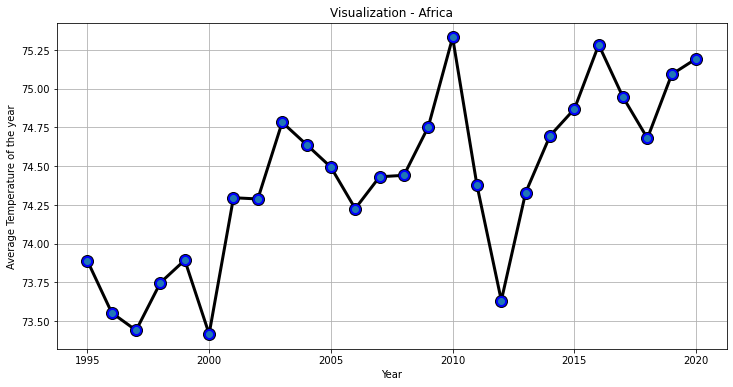

In [24]:
x= africa['Year']
y= africa['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Africa')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='blue', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Asia

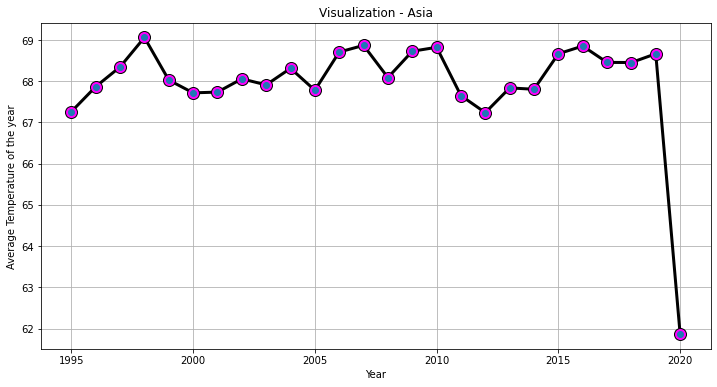

In [25]:
asia = groupby_region_year[groupby_region_year['Region'] == 'Asia']

x= asia['Year']
y= asia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Asia')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='magenta', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! because it's out of range and has missing values.
So we decided to delete these invalid data of Asia.

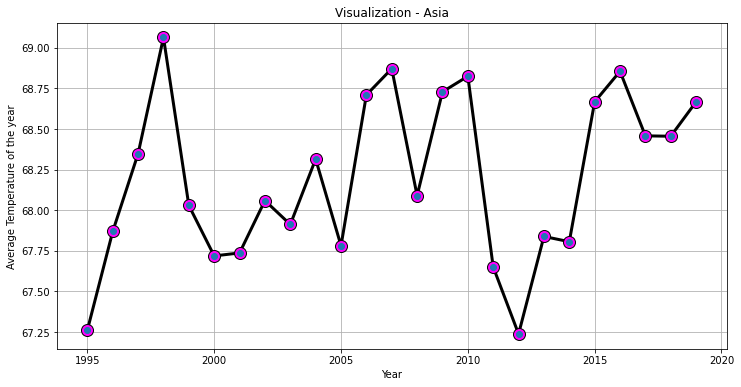

In [26]:
asia = asia[asia['Year'] != 2020]

x= asia['Year']
y= asia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Asia')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='magenta', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Australia/South Pacific

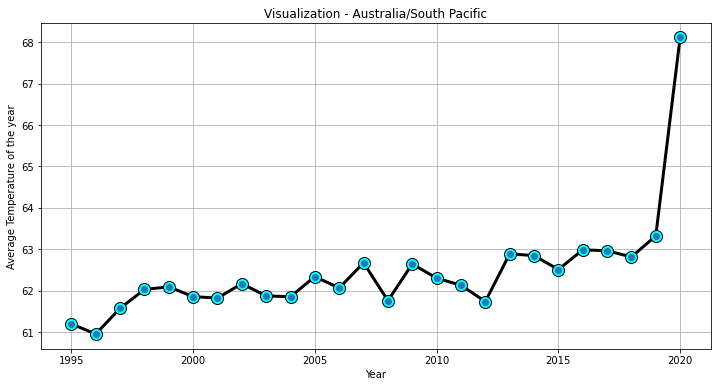

In [27]:
australia = groupby_region_year[groupby_region_year['Region'] == 'Australia/South Pacific']

x= australia['Year']
y= australia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Australia/South Pacific')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='cyan', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid datas of Australia/South Pacific.

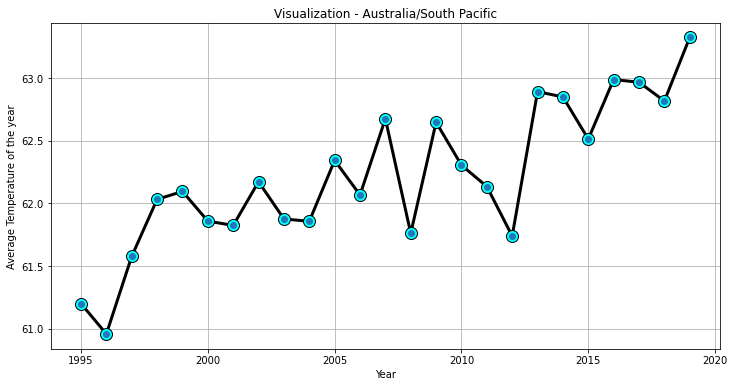

In [28]:
australia = australia[australia['Year'] != 2020]

x= australia['Year']
y= australia['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Australia/South Pacific')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='cyan', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Europe

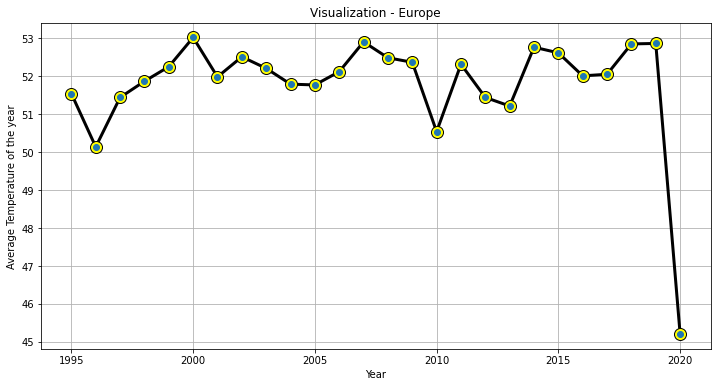

In [29]:
europe = groupby_region_year[groupby_region_year['Region'] == 'Europe']

x= europe['Year']
y= europe['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Europe')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='yellow', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid data of Europe.

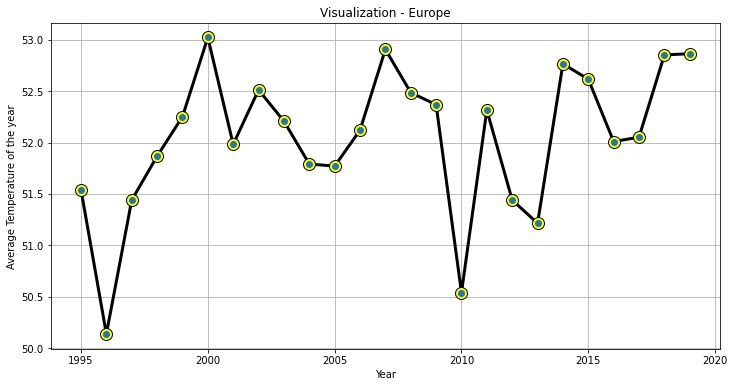

In [30]:
europe = europe[europe['Year'] != 2020]

x= europe['Year']
y= europe['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Europe')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='yellow', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## Middle East 

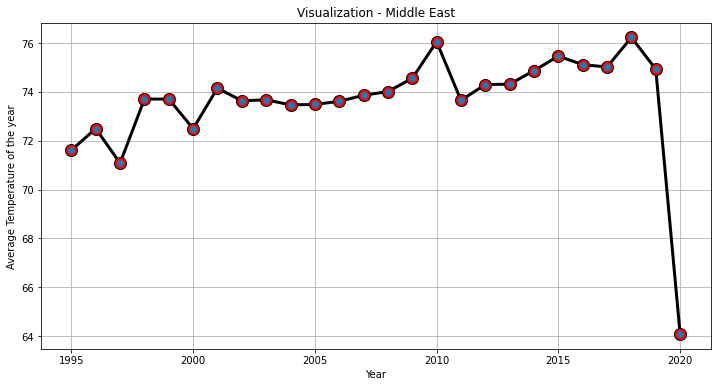

In [31]:
middle_east = groupby_region_year[groupby_region_year['Region'] == 'Middle East']

x= middle_east['Year']
y= middle_east['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Middle East')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='red', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid data of Middle East.

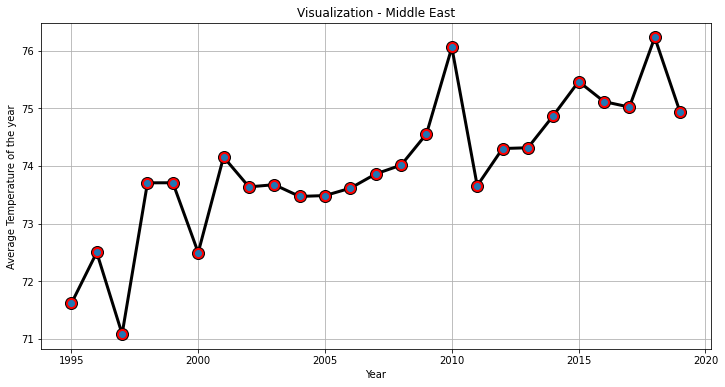

In [32]:
middle_east = middle_east[middle_east['Year'] != 2020]

x= middle_east['Year']
y= middle_east['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - Middle East')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='red', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## North America

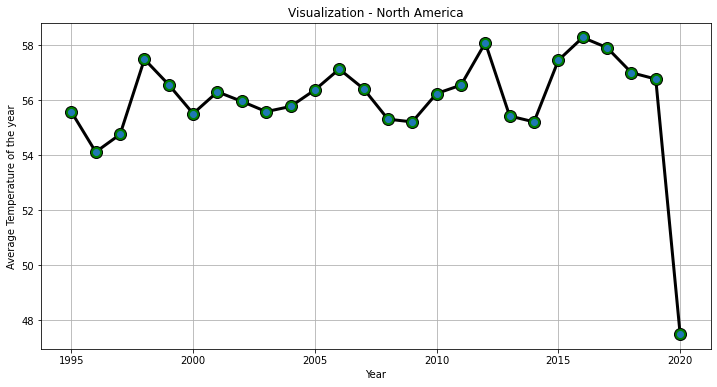

In [33]:
north_america = groupby_region_year[groupby_region_year['Region'] == 'North America']

x= north_america['Year']
y= north_america['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - North America')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='green', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* This chart shows us, the data of the year 2020 is invalid!! 
So we decided to delete these invalid data of North America.

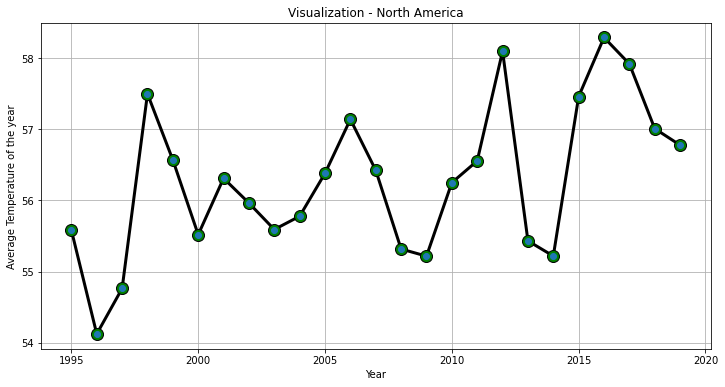

In [34]:
north_america = north_america[north_america['Year'] != 2020]

x= north_america['Year']
y= north_america['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - North America')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='green', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

## South/Central America & Carribean

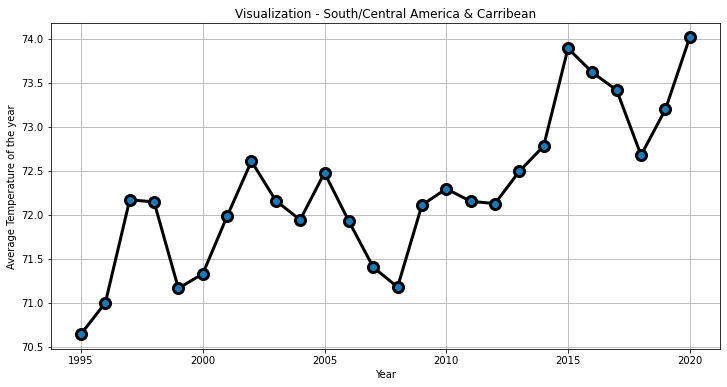

In [35]:
south_central_america = groupby_region_year[groupby_region_year['Region'] == 'South/Central America & Carribean']

x= south_central_america['Year']
y= south_central_america['AvgTemperature']

plt.figure(figsize=(12, 6))
plt.title('Visualization - South/Central America & Carribean')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='black', linewidth = 3,
        marker='o', markerfacecolor='black', markersize=12)
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* Since year 2020 is not valid for all the regions. So we delete the year 2020 for all regions from our data frame.

In [36]:
cities_temp_until_2019 = cities_temp[cities_temp['Year'] != 2020]

## Comparing Countries bordering Pacific Ocean vs. Atlantic Ocean

In [37]:
pacific_ocean = ["Colombia", "Peru", "Equador"]
atlantic_ocean = ["South Africa", "Gabon", "Namibia"]

In [38]:
pacific_dict = {}
for country in pacific_ocean:
    country_temp = cities_temp_until_2019[cities_temp_until_2019["Country"] == country][["Year", "AvgTemperature"]]
    country_temp = country_temp.groupby("Year")["AvgTemperature"].mean().reset_index()
    pacific_dict[country] = country_temp

In [39]:
atlantic_dict = {}
for country in atlantic_ocean:
    country_temp = cities_temp_until_2019[cities_temp_until_2019["Country"] == country][["Year", "AvgTemperature"]]
    country_temp = country_temp.groupby("Year")["AvgTemperature"].mean().reset_index()
    atlantic_dict[country] = country_temp

In [40]:
# Computing the average Temperatures for all 3 Atlantic ocean countries in the dictionary, from beginning to the end:
atlantic_avg= (atlantic_dict["Namibia"]["AvgTemperature"] + atlantic_dict["Gabon"]["AvgTemperature"] + atlantic_dict["South Africa"]["AvgTemperature"]) / 3
# Computing the Average Temperatures for all 3 Pacific ocean countries in the dictionary, from beginning to the end:
pacific_avg= (pacific_dict["Colombia"]["AvgTemperature"] + pacific_dict["Peru"]["AvgTemperature"] + pacific_dict["Equador"]["AvgTemperature"]) / 3
# In this data (pacific_avg) we do not have year ahead of 2015
# And the data (atlantic_avg) we have data until 2019
# so:
# Anyway we visualize the years for atlantic_avg until 2019 and pacific_avg until 2015

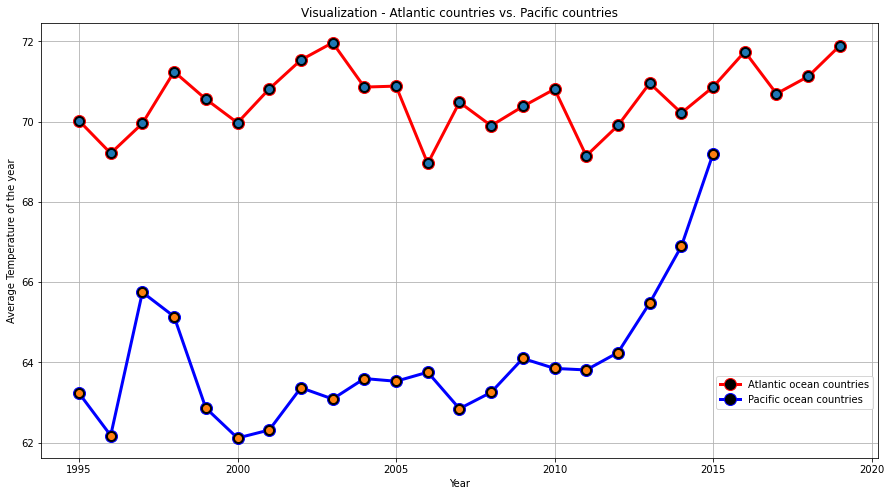

In [41]:
years= []
for i in range (1995, 2020):
    years.append(i)

result = [atlantic_avg, pacific_avg]
region_name= ["Atlantic ocean countries", "Pacific ocean countries"]
colors= ['red','blue', 'green', 'purple', 'orange', 'black', 'cyan']

plt.figure(figsize=(15, 8))
for avT, i, co in zip(result, range(0, len(region_name)), colors):
    
    x= years
    y= avT
    
    plt.title('Visualization - Atlantic countries vs. Pacific countries')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature of the year')
    plt.plot(x, y, linewidth = 3, color= co,
            marker='o', markerfacecolor='black', markersize=12, label = region_name[i])
    plt.plot(x, y, 'o')
    plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.2))
plt.grid()

Here we see that Average temperature of countries bordering the Atlantic ocean haven't changed highly, but Average temperature rates for countries bordering the Pacific ocean have changed much more, this can shows us that oceans can have an effect though small on countries temperatures.

Note 1. Pacific ocean affects on its adjacent area and can be affected as well more than Atlantic ocean.

Note 2. The countries in adjacency of the Atlantic ocean have obviously higher average temperatures than countries in adjacency of the Pacific ocean.

The countries we have studied on, in adjacency of Atlantic ocean are:
* South Africa 
* Gabon 
* Namibia

And the countries we have studied on, in adjacency of Pacific ocean are:
* Colombia
* Peru
* Equador

Please notice that this changes are mainly grown up from the countries with high production and with high population, but as mentioned, the oceans can be at least like a cooler or heater for near areas but what we see is that Pacific ocean (southern), is like a heater for the near areas or it has a little effect but not as a cooler for Southern America region countries like Colombia and etc.

## Visualizing all regions average temperatures by year

In [42]:
region_list = [africa, asia, europe, middle_east, south_central_america, north_america, australia]

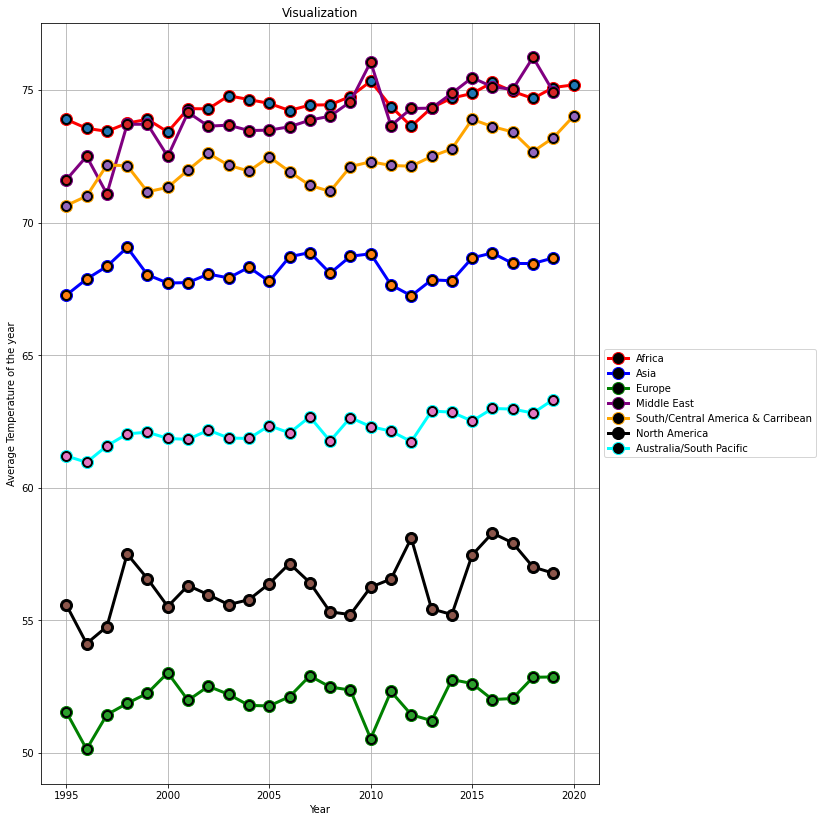

In [43]:
plt.figure(figsize=(10, 14))

for region, co in zip(region_list, colors):
    x= region['Year']
    y= region['AvgTemperature']
    
    plt.title('Visualization')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature of the year')
    plt.plot(x, y, linewidth = 3, color= co,
            marker='o', markerfacecolor='black', markersize=12, label = region.iloc[0,0])
    plt.grid()
    plt.plot(x, y, 'o')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Average Temperature difference between initial year and final year (1995 and 2019)

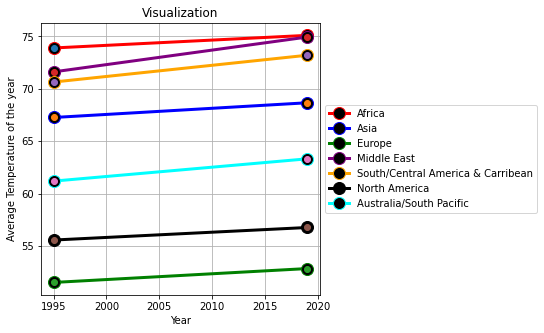

In [44]:
plt.figure(figsize=(5, 5))


for region, co in zip(region_list, colors):
    AvgT_1995_2019 = [region[region['Year']==1995]['AvgTemperature'].reset_index(), 
                      region[region['Year']==2019]['AvgTemperature'].reset_index()]
    temp_list = [AvgT_1995_2019[0]['AvgTemperature'][0], AvgT_1995_2019[1]['AvgTemperature'][0]]
    
    x= [1995, 2019]
    y= temp_list
    
    plt.title('Visualization')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature of the year')
    plt.plot(x, y, linewidth = 3, color= co,
            marker='o', markerfacecolor='black', markersize=12, label = region.iloc[0,0])
    plt.grid()
    plt.plot(x, y, 'o')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<b> Now specifying maximum and minimum average temperature difference among the regions from year 1995 to 2019: <b>

In [45]:
difference_AvgTemp = {}

for region in region_list:
    AvgT_1995_2019 = [region[region['Year']==1995]['AvgTemperature'].reset_index(), 
                      region[region['Year']==2019]['AvgTemperature'].reset_index()]
    
    temp_list = [AvgT_1995_2019[0]['AvgTemperature'][0], AvgT_1995_2019[1]['AvgTemperature'][0]]
    
    y= temp_list
    difference_AvgTemp[region.iloc[0,0]] = temp_list[1] - temp_list[0]
    
region_list = list(difference_AvgTemp.keys())
diff_AvgTemp_list = list(difference_AvgTemp.values())

max_diff_AvgTemp = max(diff_AvgTemp_list)
max_position = diff_AvgTemp_list.index(max_diff_AvgTemp)
max_region = region_list[max_position]

min_diff_AvgTemp = min(diff_AvgTemp_list)
min_position = diff_AvgTemp_list.index(min_diff_AvgTemp)
min_region = region_list[min_position]

print("1. Max average temperature difference related to " + max_region + ":", max_diff_AvgTemp )
print("2. Min average temperature difference related to " + min_region + ":", min_diff_AvgTemp )

1. Max average temperature difference related to Middle East: 3.3201037409451146
2. Min average temperature difference related to North America: 1.1953853227040483


Our analysis of these temperature changes: 
    
* <b> Middle East </b> has the most temperature changes and the reason for this change can be the following factors:

    - Fossil fuels
    - Greenhouse Gases
    - ...

* <b> North America </b> has a lower temperature changes and it shows us, it has a better performance. 

# Visualizing  for every region average Temperature by month

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


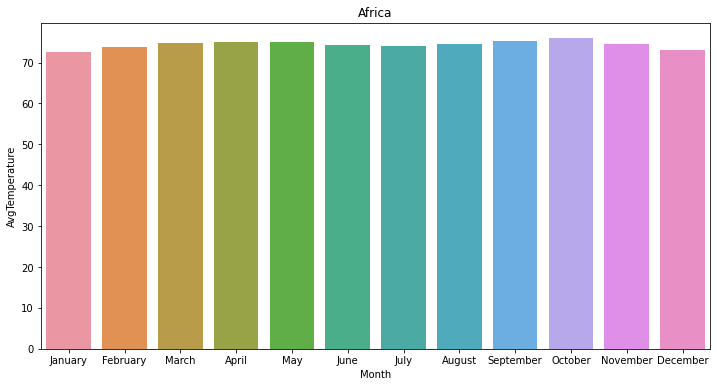

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


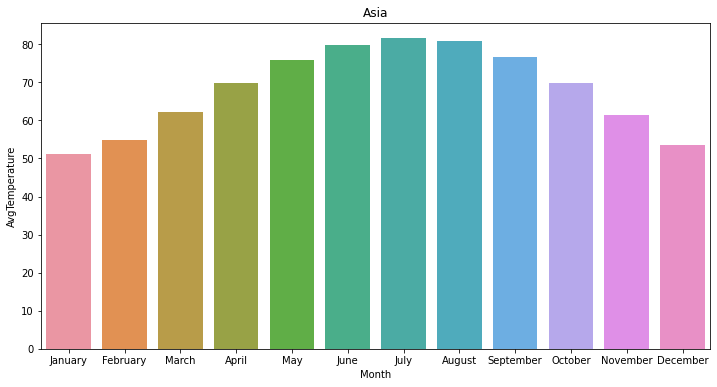

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


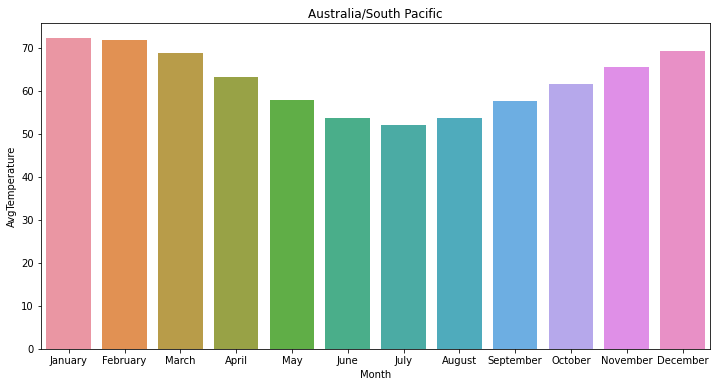

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


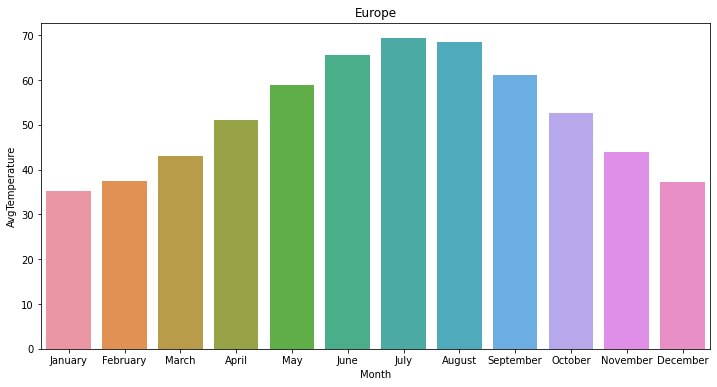

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


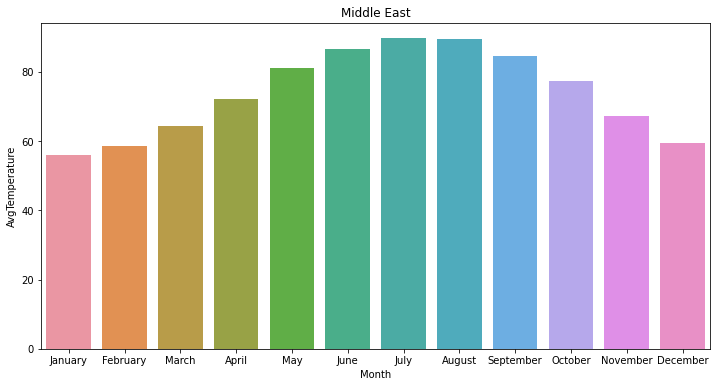

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


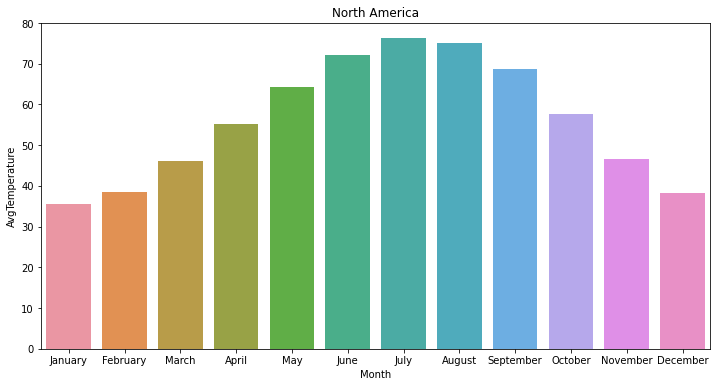

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


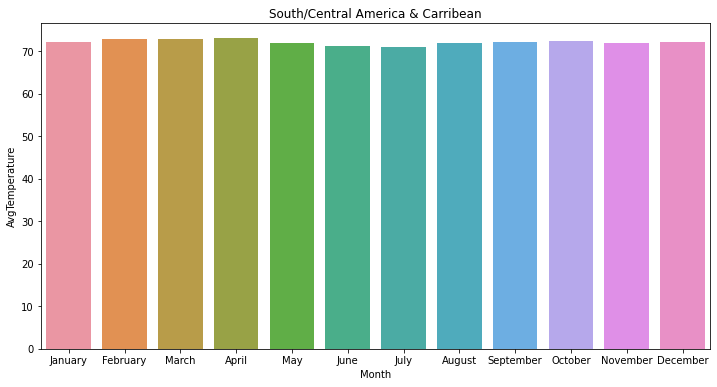

In [46]:
groupby_region_month = cities_temp.groupby(["Region", "Month"])["AvgTemperature"].mean().reset_index()

month_name = []
for i in range(0, 12):
    
    datetime_object = datetime.datetime.strptime(str(i+1), "%m")
    month_name.append(datetime_object.strftime("%B"))

for region in regions:
    plt.figure(figsize = (12, 6))
    
    x= groupby_region_month[groupby_region_month['Region'] == region]['Month']
    y= groupby_region_month[groupby_region_month['Region'] == region]['AvgTemperature']
    
    sns.barplot(x, y)
    plt.xticks(x-1, month_name)
    plt.title(region)
    plt.show()

* In Regions <b> Asia, Middle East, Europe and North America </b> ...
    - We have 4 seasons in these regions.
    - The hotest months are June, July and August; These months form the summer season.
    
* In Region <b> Africa and South/Central America and Carribean </b> ...
    - We see no major difference in Temperature among the months.
    - So it shows that, they located on Equator circle.
    
* In Region <b> Australia/South Pacific </b> ...
    - We have 4 seasons in this region.
    - The coldest months are June, July and August.
    - Here, the hotest months are December, January and February.
    - Unlike above regions the hotest months are not June, July and August; These months form the winter season.
    

# The Global average Temperature by year

In [47]:
cities_temp_until_2019

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,San Juan Puerto Rico,7,30,2013,83.8


In [48]:
# Grouping Years with Average Temperatures for all regions:
groupby_year = cities_temp_until_2019.groupby("Year")["AvgTemperature"].mean().reset_index()
groupby_year

,Year,AvgTemperature
0,1995,59.421659
1,1996,58.674830
2,1997,59.133617
3,1998,60.870440
4,1999,60.327687
5,2000,59.699026
6,2001,60.326280
7,2002,60.256346
8,2003,59.998360
9,2004,60.092934


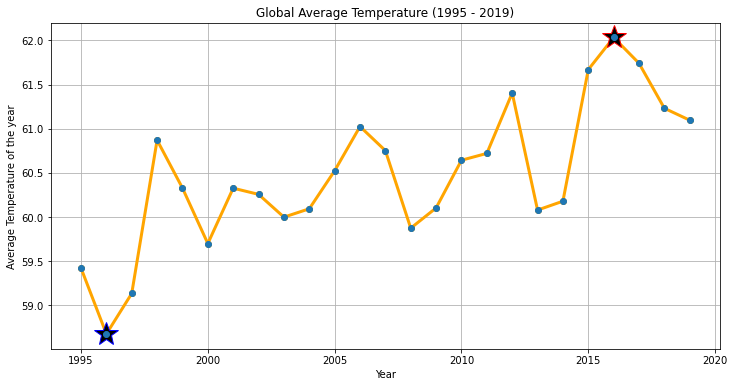

In [49]:
x= groupby_year['Year']
y= groupby_year['AvgTemperature']
# specifying the maximum and the minimum average temperatures in years:
max_temp = max(y)
max_year = groupby_year[groupby_year["AvgTemperature"] == max_temp]["Year"].values

min_temp = min(y)
min_year = groupby_year[groupby_year["AvgTemperature"] == min_temp]["Year"].values

plt.figure(figsize=(12, 6))
plt.title('Global Average Temperature (1995 - 2019)')
plt.xlabel('Year')
plt.ylabel('Average Temperature of the year')
plt.plot(x, y, color='orange', linewidth = 3,
        marker='o', markerfacecolor='black', markersize=6)
plt.plot(max_year, max_temp, color='red', linewidth = 3,
        marker='*', markerfacecolor='black', markersize=25)
plt.plot(min_year, min_temp, color='blue', linewidth = 3,
        marker='*', markerfacecolor='black', markersize=25)

plt.plot
plt.grid()
plt.plot(x, y, 'o')
plt.show()

* The <b> hottest </b> year in this range is <b> 2016 </b> and this year broke the record of the hottest years.
* The <b> coldest </b> year in this range is <b> 1996 </b> and this year broke the record of the coldest year.



<b> *WARNING* </b>

<b> ALSO: </b>

This chart shows us that the temperature of the global and earth is rising and we have a huge disaster about this, and effects of Climate Change are:
* More frequent and intense drought 
* storms
* heat waves 
* rising sea levels 
* melting glaciers and warming oceans 
* harm animals directly, destroy the places they live 
* wreak havoc on people’s livelihoods and communities

<hr>
    

# Machine Learning section: Model/ Train/ Test:

### Spliting target variables and independent variables

In [50]:
X= groupby_year["Year"].values
y= groupby_year["AvgTemperature"].values

### Splitting to training and testing data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

## 1. Linear Regression Model

In [52]:
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

# Create a Linear regressor
lrm = LinearRegression()

# Train the model using the training sets 
lrm.fit(X_train, y_train)

LinearRegression()

In [53]:
# Value of y intercept(constant)
constant = lrm.intercept_
constant

array([-109.41270841])

In [54]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([groupby_year.columns[0],lrm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Year,[[0.08453550265003636]]


Our <b> Regression Equation </b>:

y_train = constant + coeffcient (X_train)

y_train = -109.41270841 + 0.08453550265004377 * (X_train)

### Model Evaluation for Train Data

In [55]:
y_train_pred = lrm.predict(X_train)

In [56]:
# Model Evaluation for train data
print('R^2:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.6248296820440786
Adjusted R^2: 0.5998183275136839
MAE: 0.37696248389268094
MSE: 0.2135040615298973
RMSE: 0.46206499708363247


### Visualizing Train Data and Predicted Train Data

Text(0.5, 1.0, 'Regression Line and Train Data')

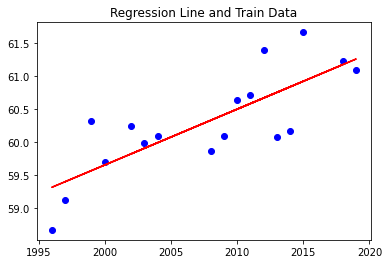

In [57]:
plt.plot(X_train, y_train_pred, color= 'red')
plt.scatter(X_train, y_train, color= 'blue')

plt.title("Regression Line and Train Data")

Text(0.5, 1.0, 'Train data vs predicted train data')

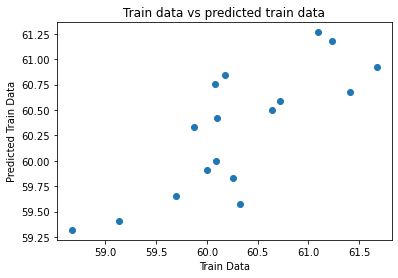

In [58]:
plt.scatter(y_train, y_train_pred)

plt.xlabel("Train Data")
plt.ylabel("Predicted Train Data")
plt.title("Train data vs predicted train data")

### Checking Normality of errors for Train Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

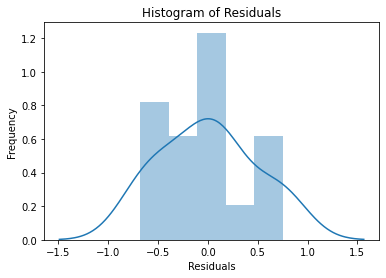

In [59]:
sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

### Model Evaluation for Test Data

In [60]:
y_test_pred = lrm.predict(X_test)

In [61]:
# Model Evaluation for test data

acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.05945844019350188
Adjusted R^2: -0.23603484689241871
MAE: 0.7028444330139836
MSE: 0.6164224033843493
RMSE: 0.7851257245717715


### Visualizing Test Data and Predicted Test Data

Text(0.5, 1.0, 'Regression Line and Train Data')

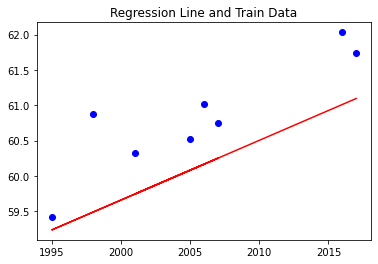

In [62]:
plt.plot(X_test, y_test_pred, color= 'red')
plt.scatter(X_test, y_test, color= 'blue')

plt.title("Regression Line and Train Data")

Text(0.5, 1.0, 'Test data vs predicted test data')

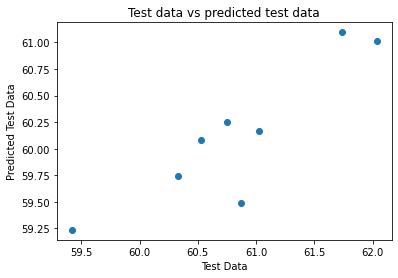

In [63]:
plt.scatter(y_test, y_test_pred)

plt.xlabel("Test Data")
plt.ylabel("Predicted Test Data")
plt.title("Test data vs predicted test data")

### Checking Normality of errors for Test Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

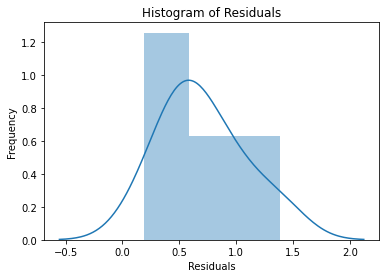

In [64]:
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

## 2. Random Forest Regressor Model

In [65]:
# Create a Random Forest Regressor
rfreg = RandomForestRegressor()

# Train the model using the training sets 
rfreg.fit(X_train, y_train)

C:\Users\AM4BBE~1.BRN\AppData\Local\Temp/ipykernel_12984/3016296843.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train, y_train)


RandomForestRegressor()

### Model Evaluation for Train Data

In [66]:
y_train_pred = rfreg.predict(X_train)

In [67]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.9256289141823154
Adjusted R^2: 0.9206708417944698
MAE: 0.14986739902294613
MSE: 0.042323521138284095
RMSE: 0.20572681190910458


### Visualizing Train Data and Predicted Train Data

Text(0.5, 1.0, 'Train data vs predicted train data')

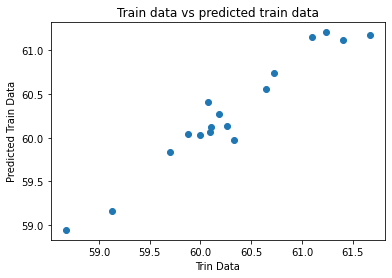

In [68]:
plt.scatter(y_train, y_train_pred)

plt.xlabel("Trin Data")
plt.ylabel("Predicted Train Data")
plt.title("Train data vs predicted train data")

### Checking Normality of errors for Train Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

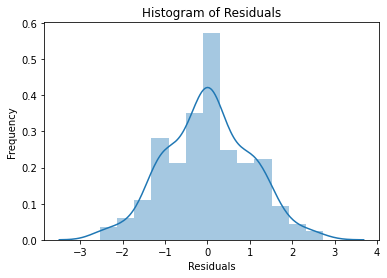

In [69]:
sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

### Model Evaluation for Test Data

In [70]:
y_test_pred = rfreg.predict(X_test)

In [71]:
# Model Evaluation for test data

acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.05945844019350188
Adjusted R^2: -0.3029298892625025
MAE: 0.7277357496049195
MSE: 0.6497836010042526
RMSE: 0.8060915586980505


### Visualizing Test Data and Predicted Test Data

Text(0.5, 1.0, 'Test data vs predicted test data')

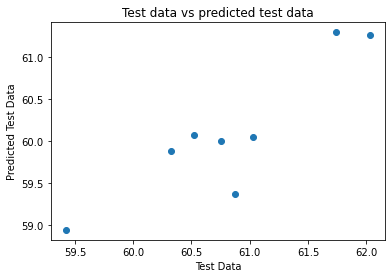

In [72]:
plt.scatter(y_test, y_test_pred)

plt.xlabel("Test Data")
plt.ylabel("Predicted Test Data")
plt.title("Test data vs predicted test data")

### Checking Normality of errors for Test Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

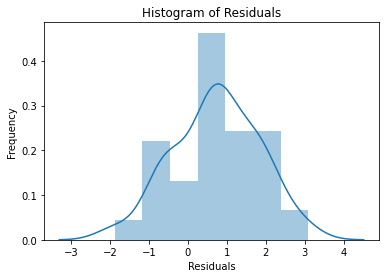

In [73]:
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

## 3. XGBoost Regressor Model

In [74]:
xgbreg = XGBRegressor()
xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Model Evaluation for Train Data

In [75]:
y_train_pred = xgbreg.predict(X_train)

In [76]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.9999965451338239
Adjusted R^2: 0.9999963148094121
MAE: 0.0012073569032379544
MSE: 1.966114922575964e-06
RMSE: 0.0014021822002065081


### Visualizing Train Data and Predicted Train Data

Text(0.5, 1.0, 'Train data vs predicted train data')

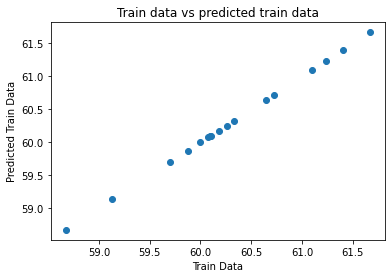

In [77]:
plt.scatter(y_train, y_train_pred)

plt.xlabel("Train Data")
plt.ylabel("Predicted Train Data")
plt.title("Train data vs predicted train data")

### Checking Normality of errors for Train Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

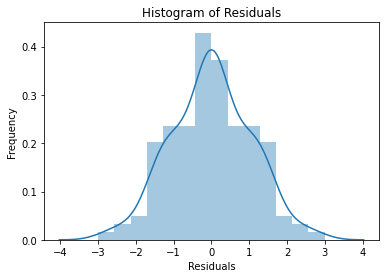

In [78]:
sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

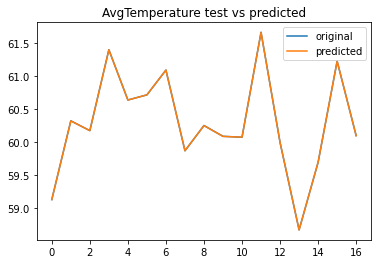

In [79]:
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, label="original")
plt.plot(x_ax, y_train_pred, label="predicted")
plt.title("AvgTemperature test vs predicted")
plt.legend()
plt.show()

### Model Evaluation for Test Data

In [80]:
y_test_pred = xgbreg.predict(X_test)
y_test_pred
print(X_test)

[[2017]
 [2016]
 [1995]
 [1998]
 [2007]
 [2005]
 [2001]
 [2006]]


In [81]:
# Model Evaluation for test data

acc_xgbreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.05945844019350188
Adjusted R^2: 0.11526402308418371
MAE: 0.5871732764675928
MSE: 0.441226296024092
RMSE: 0.664248670321659


### Visualizing Test Data and Predicted Test Data

Text(0.5, 1.0, 'Test data vs predicted test data')

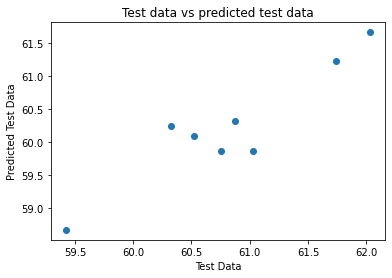

In [82]:
plt.scatter(y_test, y_test_pred)

plt.xlabel("Test Data")
plt.ylabel("Predicted Test Data")
plt.title("Test data vs predicted test data")

### Checking Normality of errors for Test Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

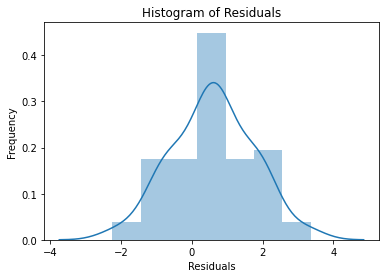

In [83]:
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

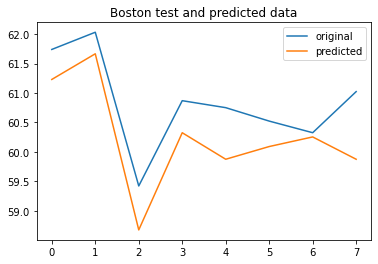

In [84]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

## 4. SVM Model

In [85]:
# Creating scaled set to be used in model to improve our results

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
svm_svr = svm.SVR()
svm_svr.fit(X_train, y_train)

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Model Evaluation for Train Data

In [87]:
# Model prediction on train data
y_train_pred = svm_svr.predict(X_train)

In [88]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2: 0.6674048755235039
Adjusted R^2: 0.6452318672250709
MAE: 0.3375676156639897
MSE: 0.18927512791434808
RMSE: 0.4350576144769197


### Visualizing Train Data and Predicted Train Data

Text(0.5, 1.0, 'Train data vs predicted train data')

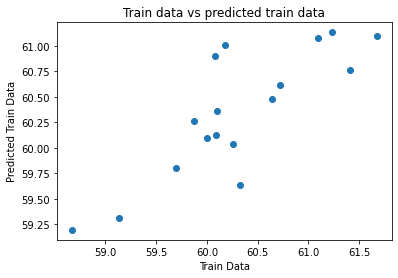

In [89]:
plt.scatter(y_train, y_train_pred)

plt.xlabel("Train Data")
plt.ylabel("Predicted Train Data")
plt.title("Train data vs predicted train data")

### Checking Normality of errors for Train Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

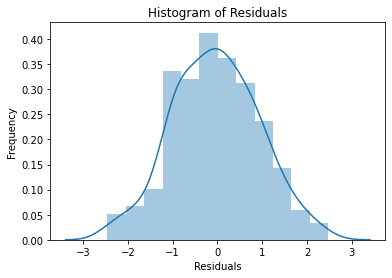

In [90]:
sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

### Model Evaluation for Test Data

In [91]:
y_test_pred = svm_svr.predict(X_test)

In [92]:
# Model Evaluation for test data

acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.05945844019350188
Adjusted R^2: -0.1395327851709982
MAE: 0.6700095891789388
MSE: 0.5682959019613353
RMSE: 0.7538540322644267


### Visualizing Test Data and Predicted Test Data

Text(0.5, 1.0, 'Test data vs predicted test data')

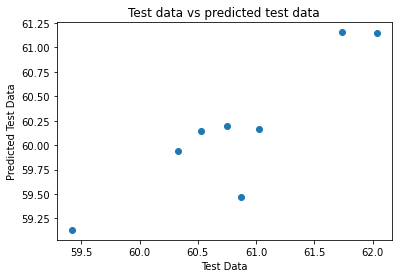

In [93]:
plt.scatter(y_test, y_test_pred)

plt.xlabel("Test Data")
plt.ylabel("Predicted Test Data")
plt.title("Test data vs predicted test data")

### Checking Normality of errors for Test Data

C:\Users\A.M.Brn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

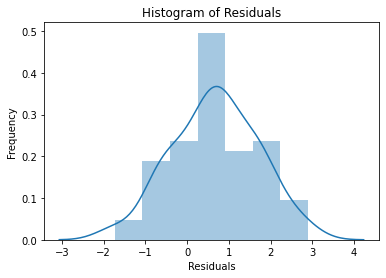

In [94]:
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Compare of all the models with each other

In [95]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgbreg*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,24.165488
3,Support Vector Machines,2.325761
0,Linear Regression,-5.945844
1,Random Forest,-11.679705


* <b> XGBoost </b> is the best Model for us in evaluating  process, because it has more score than others so we can use it for future prediction.